In [ ]:
from google.colab import files
uploaded = files.upload()


Saving retail_sales_dataset.csv to retail_sales_dataset.csv


In [ ]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
dataset = pd.read_csv('retail_sales_dataset.csv')
dataset.head(10)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [ ]:
# Memisahkan data berdasarkan gender
women_df = dataset[dataset['Gender'] == 'Female']
men_df = dataset[dataset['Gender'] == 'Male']


# Menghitung mean dan median Total Amount
men_amount_mean = men_df['Total Amount'].mean()
men_amount_median = men_df['Total Amount'].median()
women_amount_mean = women_df['Total Amount'].mean()
women_amount_median = women_df['Total Amount'].median()

# Menampilkan hasil
print(f"Men mean amount: {men_amount_mean:.2f} \t Median: {men_amount_median:.2f}")
print(f"Women mean amount: {women_amount_mean:.2f} \t Median: {women_amount_median:.2f}")
print(f"Difference between Mean: {abs(men_amount_mean - women_amount_mean):.2f} \t Median: {abs(men_amount_median - women_amount_median):.2f}")


Men mean amount: 455.43 	 Median: 120.00
Women mean amount: 456.55 	 Median: 150.00
Difference between Mean: 1.12 	 Median: 30.00


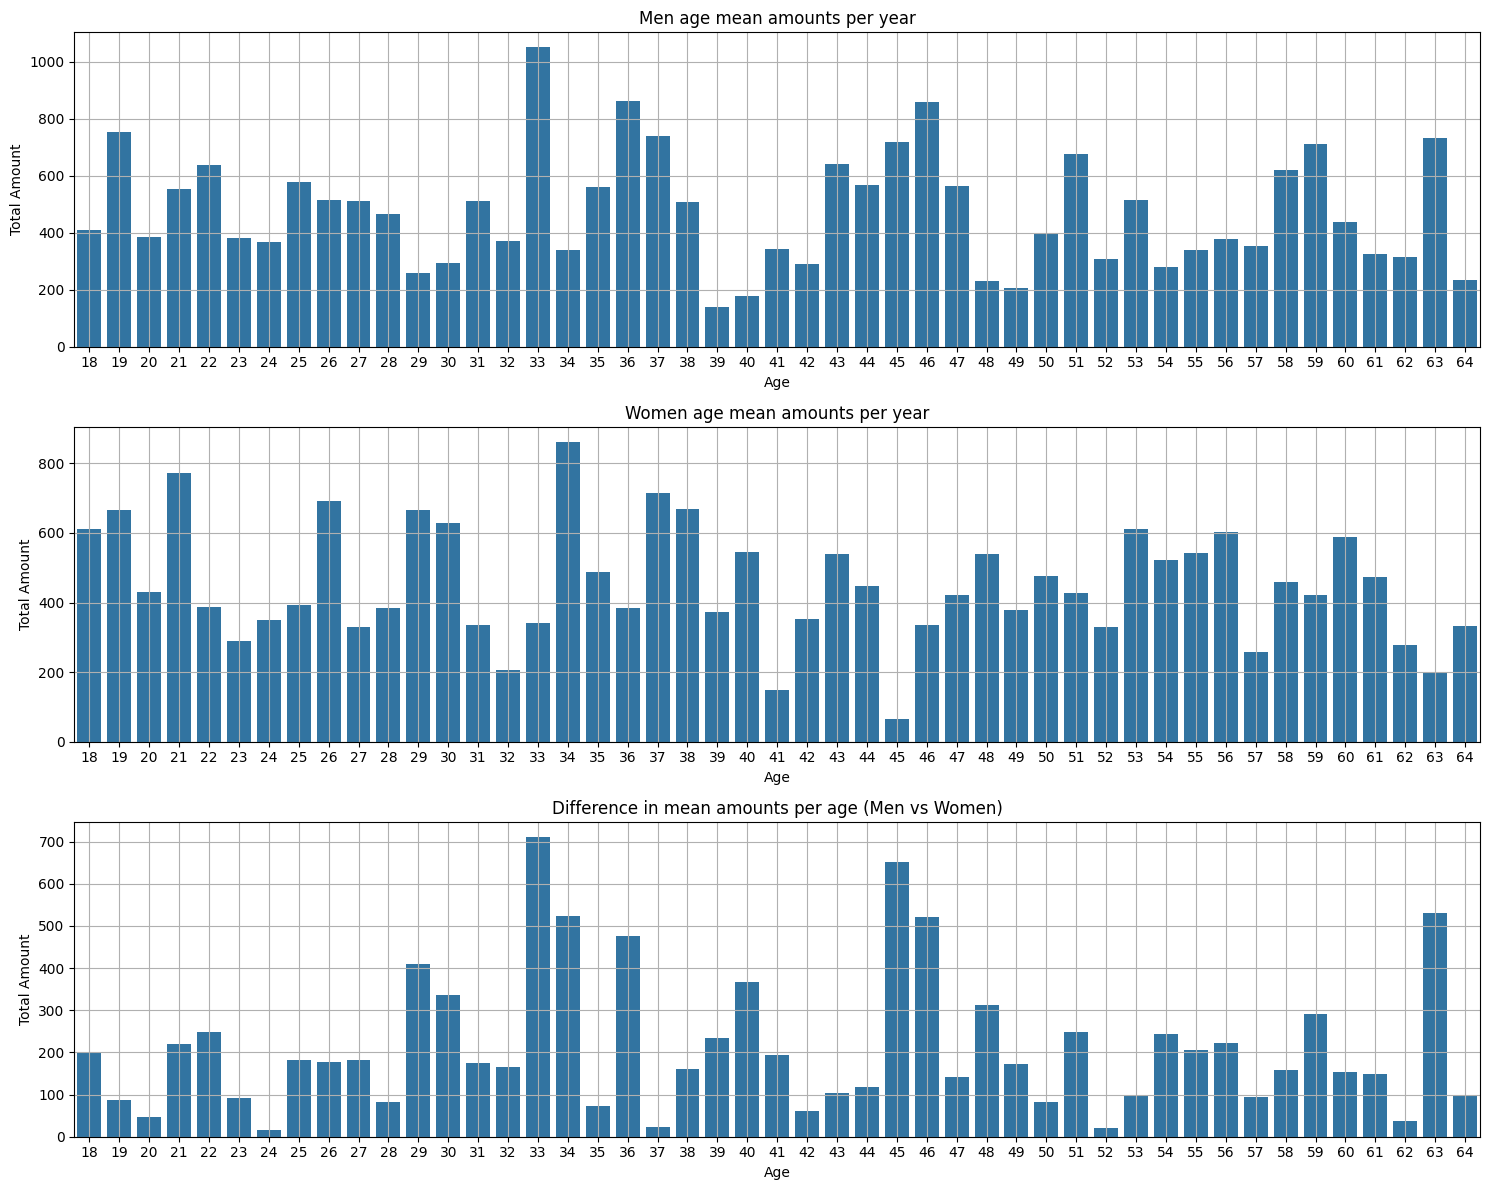

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan variabel dataset sudah ada dan men_df, women_df sudah didefinisikan

# Grouping & menghitung rata-rata Total Amount per usia
age_amount_per_year_men = pd.DataFrame(
    men_df.groupby(['Age'])['Total Amount'].mean()
).reset_index()

age_amount_per_year_women = pd.DataFrame(
    women_df.groupby(['Age'])['Total Amount'].mean()
).reset_index()

# Menghitung selisih absolut antara rata-rata pria & wanita per usia
age_amount_per_year_diff = pd.DataFrame({
    'Age': age_amount_per_year_men['Age'],
    'Total Amount': abs(
        age_amount_per_year_men['Total Amount'] - age_amount_per_year_women['Total Amount']
    )
})

# Membuat plot
fig, ax = plt.subplots(3, 1, figsize=(15, 12))

# Barplot untuk pria
sns.barplot(data=age_amount_per_year_men, x='Age', y='Total Amount', ax=ax[0])
ax[0].set_title('Men age mean amounts per year')
ax[0].grid()

# Barplot untuk wanita
sns.barplot(data=age_amount_per_year_women, x='Age', y='Total Amount', ax=ax[1])
ax[1].set_title('Women age mean amounts per year')
ax[1].grid()

# Barplot untuk selisih
sns.barplot(data=age_amount_per_year_diff, x='Age', y='Total Amount', ax=ax[2])
ax[2].set_title('Difference in mean amounts per age (Men vs Women)')
ax[2].grid()

# Atur layout agar tidak bertumpuk
plt.tight_layout()
plt.show()


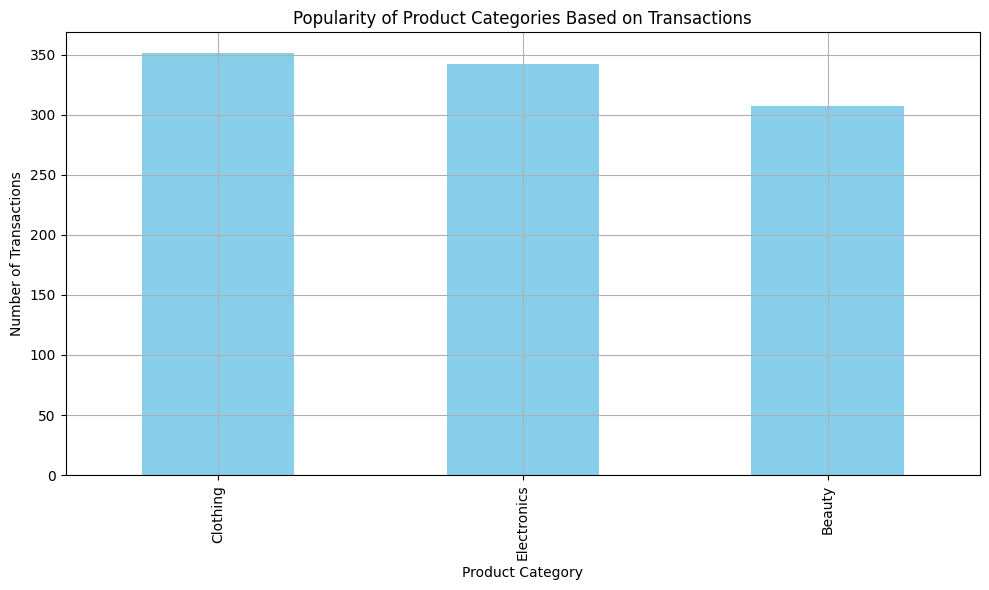

In [ ]:
import matplotlib.pyplot as plt

# Plot bar untuk jumlah transaksi per kategori produk
dataset["Product Category"].value_counts().plot(
    kind='bar',
    grid=True,
    title='Popularity of Product Categories Based on Transactions',
    figsize=(10, 6),
    color='skyblue'
)

plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()
